In [91]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import math
import random
import scipy
from scipy.spatial import distance
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
# plt.style.use('ggplot')
np.random.seed(17)


In [92]:
def countQual():
    s = 0
    for i in range(len(clusters)):
        for j in range(len(clusters)):
            if(clusters[i]==clusters[j] and rightCl[i]==rightCl[j] and i!=j):
                s+=1
    print(s)
    print("quantity: ",s/(50*49*7)*100," %")
                

In [93]:
def distanceCenter(a, b):
    c = []
    for i in range(len(a)):  
        v1 = a[i]
        v2 = b[i]
        z = np.vstack((v1, v2))
        cov = np.cov(z.T)
        mah = scipy.spatial.distance.mahalanobis(v1,v2,cov)
        c.append(mah)
    return c

In [94]:
def dist(dot, centers):
    c = []
    for i in range(len(centers)):
        v1 = centers[i]
        z = np.vstack((v1, dot))
        cov = np.cov(z.T)
        mah = scipy.spatial.distance.mahalanobis(v1,dot,cov)
        c.append(mah)
    return c
        

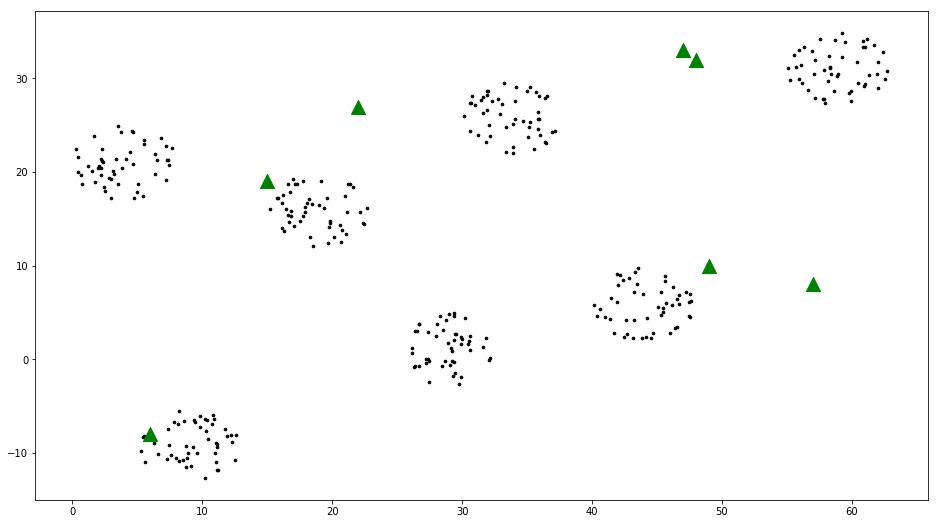

In [95]:
k = 7 #kol-vo klasterov
f = open('dots.txt','r')

dots = []
rightCl = []
for line in f.readlines():
    line = line.split(' ')[:-1]
    rightCl.append(line[-1])
    line = line[:-1]
    dot = list(map(float,line))
    dots.append(dot)
dots = np.array(dots)
xdots = dots[:,0]
ydots = dots[:,1]
xcenters = np.random.randint(np.min(dots[:,0]),np.max(dots[:,0]),size = k)
ycenters = np.random.randint(np.min(dots[:,1]),np.max(dots[:,1]),size = k)
centers = np.array(list(zip(xcenters,ycenters)), dtype = np.float32)
plt.scatter(xdots, ydots, c='#050505', s=7)
plt.scatter(xcenters, ycenters, marker='^', s=200, c='g')

C:\Users\Acer\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Acer\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Acer\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


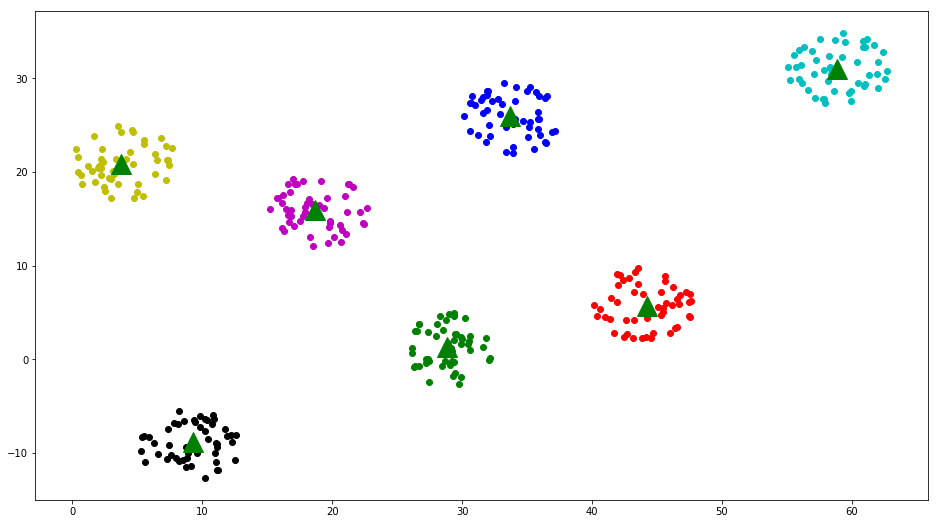

17150
quantity:  100.0  %


In [96]:
centersOld = np.zeros(centers.shape)
clusters = np.zeros(len(xdots))
error = np.max(distanceCenter(centers,centersOld))
flag = True
count = 0
colors = ['bo', 'go', 'ro', 'co', 'mo', 'yo', 'ko', 'bs', 'gs', 'rs', 'cs', 'ms', 'ys', 'ks', 'b^', 'g^', 'r^', 'c^', 'm^', 'y^', 'k^']
while (flag==False) or (error > 0.000001):
    for i in range(len(dots)):
        distance = dist(dots[i], centers)
        cluster = np.argmin(distance)
        clusters[i] = cluster
    centersOld = deepcopy(centers)
    for i in range(k):
        points = [dots[j] for j in range(len(dots)) if clusters[j] == i]
        centers[i] = np.mean(points, axis = 0)
    error = np.max(distanceCenter(centers,centersOld))
    flag= True
    for c in range(k):
        if c not in clusters:
            flag= False
#         points = [dots[j] for j in range(len(dots)) if clusters[j] == c]
#         if(len(points) < 30):
#             flag = False
    if(flag == False):
        xcenters = np.random.randint(np.min(dots[:,0]),np.max(dots[:,0]),size = k)
        ycenters = np.random.randint(np.min(dots[:,1]),np.max(dots[:,1]),size = k)
        centers = np.array(list(zip(xcenters,ycenters)), dtype = np.float32)
    count += 1
    
# colors = random.sample(range(k),k)
# colors = np.random.rand(k)
# print(colors)
# fig, ax = plt.subplots()
for i in range(k):
        points = np.array([dots[j] for j in range(len(dots)) if clusters[j] == i])
        plt.plot(points[:,0],points[:,1],colors[i])
#         ax.scatter(points[:, 0], points[:, 1],c=colors[i])
#         ax.scatter(points[:, 0], points[:, 1],c=colors[i], s=7)
plt.plot(centers[:,0],centers[:,1],'g^',markersize=20)
plt.show()
countQual()
# plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, c='#050505')